In [7]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [5]:
import pytesseract
import cv2


pdf_file = r"C:\Users\Cheng\Downloads\1-19-1938 Leela Menon(scan).png"
image = cv2.imread(pdf_file)


data = pytesseract.image_to_data(image, output_type='data.frame', config="--psm 1")


for i, row in data.iterrows():
    
    if row['text'] != '':
        
        x, y, w, h = row['left'], row['top'], row['width'], row['height']
        
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)


cv2.imwrite(r"C:\Users\Cheng\Downloads\Open Peeps - Avatar.png", image)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Cheng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Cheng\AppData\Local\Temp\ipykernel_42108\2325693761.py", line 1, in <module>
    import pytesseract
  File "C:\Users\Cheng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pytesseract\__init__.py", line 2, in <module>
    from .pytesseract import ALTONotSupported
  File "C:\Users\Cheng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pytesseract\pytesseract.py", line 34, in <module>
    from numpy import ndarray
  File "C:\Users\Cheng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\

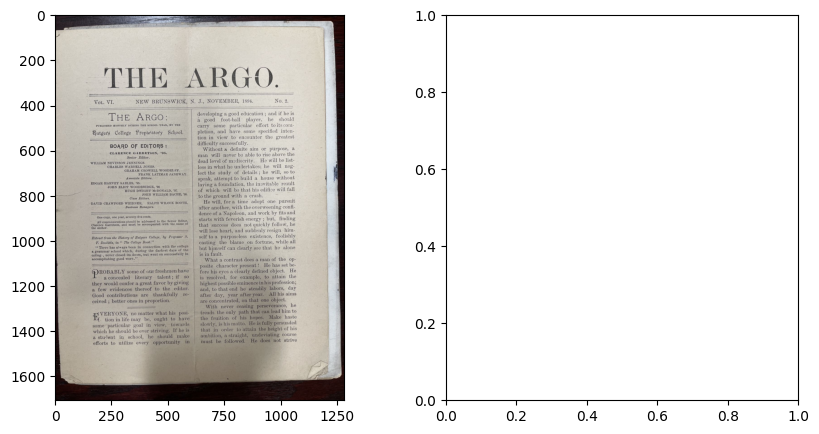

In [3]:
import matplotlib.pyplot as plt
import cv2

# Load the image
img = cv2.imread('Newspaper Test.jpg', cv2.IMREAD_GRAYSCALE)

# Preprocess the image
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(contours[0])
angle = rect[-1]
rows, cols = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
img = cv2.warpAffine(img, M, (cols, rows))
img = cv2.equalizeHist(img)
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot the images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(cv2.imread('NewsPaper Test.jpg'), cv2.COLOR_BGR2RGB))


In [8]:
import pytesseract
from PIL import Image

print(pytesseract.image_to_osd(Image.open('Newspaper Test.jpg')))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 9.21
Script: Latin
Script confidence: 2.04



In [13]:
import pytesseract

hocr = pytesseract.image_to_pdf_or_hocr('Newspaper Test.jpg', extension='hocr')

# Print the HOCR output
print(hocr)

TesseractError: (1, 'Error, cannot read input file C:\\Users\\Cheng\\OneDrive\\??\\WIN History Project\\ArgoArchive\\PDF2TEXT\\Newspaper Test.jpg: Invalid argument Error during processing.')